In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This file is downloaded from 'https://www.kaggle.com/competitions/playground-series-s3e8/leaderboard#' 

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [ ]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
193568    False
193569    False
193570    False
193571    False
193572    False
Length: 193573, dtype: bool

In [ ]:
df.corr()['price'].abs().sort_values(ascending = False)

<ipython-input-241-bbc7ffd8ce3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].abs().sort_values(ascending = False)


price    1.000000
carat    0.943396
y        0.901033
x        0.901004
z        0.893037
table    0.174915
depth    0.001880
id       0.001392
Name: price, dtype: float64

In [ ]:
df_copy = df.copy()

In [ ]:
new_df = df_copy.drop(['id','depth'],axis = 1)
new_df

,carat,cut,color,clarity,table,x,y,z,price
0,1.52,Premium,F,VS2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,55.0,4.45,4.49,2.81,681


In [ ]:
# dropping the last  column as it has more than 6 NaN value
new_df = df.drop(df.index[-1])
new_df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036


In [ ]:
converted_df = new_df.drop('id', axis=1)
converted_df = pd.get_dummies(converted_df, columns=['cut', 'color', 'clarity'],drop_first = True)
converted_df.drop('depth' ,axis = 1,inplace = True)
converted_df

,carat,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.52,58.0,7.27,7.33,4.55,13619,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2.03,58.0,8.06,8.12,5.05,13387,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0.70,57.0,5.69,5.73,3.50,2772,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.32,56.0,4.38,4.41,2.71,666,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.70,59.0,7.65,7.61,4.77,14453,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193567,0.58,57.0,5.33,5.36,3.31,1872,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
193568,0.31,56.0,4.35,4.39,2.67,1130,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
193569,0.70,58.0,5.75,5.77,3.47,2874,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
193570,0.73,57.0,5.72,5.75,3.62,3036,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.shape

(193573, 11)

<Axes: xlabel='price'>

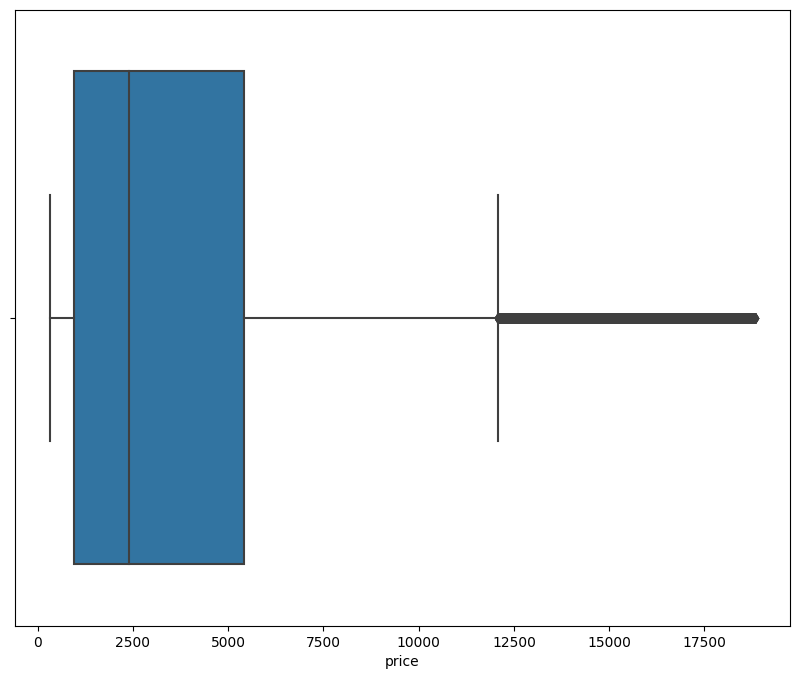

In [ ]:
# Dealing with outliers
plt.figure(figsize=(10,8),dpi = 100)
sns.boxplot(converted_df,x = 'price')

In [ ]:
converted_df.describe()['price']

count    193572.000000
mean       3969.164254
std        4034.382684
min         326.000000
25%         950.750000
50%        2401.000000
75%        5408.000000
max       18818.000000
Name: price, dtype: float64

In [ ]:
final_df = converted_df.drop(converted_df[converted_df['price'] > 11500].index)
final_df

,carat,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
2,0.70,57.0,5.69,5.73,3.50,2772,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.32,56.0,4.38,4.41,2.71,666,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1.51,58.0,7.34,7.29,4.59,7506,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
6,0.74,57.0,5.76,5.79,3.57,3229,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1.34,57.0,7.00,7.05,4.38,6224,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193567,0.58,57.0,5.33,5.36,3.31,1872,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
193568,0.31,56.0,4.35,4.39,2.67,1130,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
193569,0.70,58.0,5.75,5.77,3.47,2874,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
193570,0.73,57.0,5.72,5.75,3.62,3036,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
final_df.drop('price',axis = 1,inplace=True)
columns = final_df.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_df = scaler.fit_transform(final_df)
final_df

array([[-0.02457329, -0.09489673,  0.14482744, ..., -0.57004222,
        -0.24833864, -0.3042753 ],
       [-1.06662422, -0.6171589 , -1.20782861, ..., -0.57004222,
        -0.24833864, -0.3042753 ],
       [ 2.19664053,  0.42736545,  1.84855452, ..., -0.57004222,
        -0.24833864, -0.3042753 ],
       ...,
       [-0.02457329,  0.42736545,  0.20678115, ..., -0.57004222,
        -0.24833864,  3.28649743],
       [ 0.05769389, -0.09489673,  0.17580429, ..., -0.57004222,
        -0.24833864, -0.3042753 ],
       [-1.01177943, -1.13942108, -1.13554928, ..., -0.57004222,
        -0.24833864, -0.3042753 ]])

In [ ]:
final_df = pd.DataFrame(final_df,columns=columns)
final_df

,carat,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.024573,-0.094897,0.144827,0.181256,0.111332,-0.254639,1.028395,-0.576486,-0.48963,-0.487258,...,-0.428578,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,2.280589,-0.570042,-0.248339,-0.304275
1,-1.066624,-0.617159,-1.207829,-1.190296,-1.196818,-0.254639,1.028395,-0.576486,-0.48963,-0.487258,...,-0.428578,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,2.280589,-0.570042,-0.248339,-0.304275
2,2.196641,0.427365,1.848555,1.802180,1.916247,-0.254639,-0.972389,-0.576486,2.04236,-0.487258,...,-0.428578,-0.302688,5.705065,-0.152874,1.620086,-0.418632,-0.438483,-0.570042,-0.248339,-0.304275
3,0.085116,-0.094897,0.217107,0.243599,0.227244,-0.254639,1.028395,-0.576486,-0.48963,2.052300,...,-0.428578,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,1.754256,-0.248339,-0.304275
4,1.730460,-0.094897,1.497483,1.552807,1.568511,-0.254639,-0.972389,1.734648,-0.48963,-0.487258,...,-0.428578,-0.302688,-0.175283,-0.152874,-0.617251,2.388732,-0.438483,-0.570042,-0.248339,-0.304275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179442,-0.353642,-0.094897,-0.226895,-0.203195,-0.203286,-0.254639,1.028395,-0.576486,-0.48963,2.052300,...,-0.428578,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,1.754256,-0.248339,-0.304275
179443,-1.094047,-0.617159,-1.238805,-1.211077,-1.263053,-0.254639,1.028395,-0.576486,-0.48963,-0.487258,...,-0.428578,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,-0.570042,-0.248339,3.286497
179444,-0.024573,0.427365,0.206781,0.222818,0.061655,-0.254639,-0.972389,1.734648,-0.48963,-0.487258,...,-0.428578,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,-0.570042,-0.248339,3.286497
179445,0.057694,-0.094897,0.175804,0.202037,0.310038,-0.254639,-0.972389,-0.576486,2.04236,-0.487258,...,-0.428578,-0.302688,-0.175283,-0.152874,1.620086,-0.418632,-0.438483,-0.570042,-0.248339,-0.304275


In [ ]:
final_df = pd.concat([final_df,df['price'].loc[:179446]],axis = 1)
final_df

,carat,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-0.024573,-0.094897,0.144827,0.181256,0.111332,-0.254639,1.028395,-0.576486,-0.48963,-0.487258,...,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,2.280589,-0.570042,-0.248339,-0.304275,13619
1,-1.066624,-0.617159,-1.207829,-1.190296,-1.196818,-0.254639,1.028395,-0.576486,-0.48963,-0.487258,...,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,2.280589,-0.570042,-0.248339,-0.304275,13387
2,2.196641,0.427365,1.848555,1.802180,1.916247,-0.254639,-0.972389,-0.576486,2.04236,-0.487258,...,-0.302688,5.705065,-0.152874,1.620086,-0.418632,-0.438483,-0.570042,-0.248339,-0.304275,2772
3,0.085116,-0.094897,0.217107,0.243599,0.227244,-0.254639,1.028395,-0.576486,-0.48963,2.052300,...,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,1.754256,-0.248339,-0.304275,666
4,1.730460,-0.094897,1.497483,1.552807,1.568511,-0.254639,-0.972389,1.734648,-0.48963,-0.487258,...,-0.302688,-0.175283,-0.152874,-0.617251,2.388732,-0.438483,-0.570042,-0.248339,-0.304275,14453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179442,-0.353642,-0.094897,-0.226895,-0.203195,-0.203286,-0.254639,1.028395,-0.576486,-0.48963,2.052300,...,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,1.754256,-0.248339,-0.304275,4081
179443,-1.094047,-0.617159,-1.238805,-1.211077,-1.263053,-0.254639,1.028395,-0.576486,-0.48963,-0.487258,...,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,-0.570042,-0.248339,3.286497,7186
179444,-0.024573,0.427365,0.206781,0.222818,0.061655,-0.254639,-0.972389,1.734648,-0.48963,-0.487258,...,-0.302688,-0.175283,-0.152874,-0.617251,-0.418632,-0.438483,-0.570042,-0.248339,3.286497,1815
179445,0.057694,-0.094897,0.175804,0.202037,0.310038,-0.254639,-0.972389,-0.576486,2.04236,-0.487258,...,-0.302688,-0.175283,-0.152874,1.620086,-0.418632,-0.438483,-0.570042,-0.248339,-0.304275,609


In [ ]:
X_train = final_df.drop(['price'],axis = 1)
y_train = final_df['price']

In [ ]:
# test data preprocessing
new_test_df = df_test.drop(['id','depth'],axis = 1)
new_test_df

,carat,cut,color,clarity,table,x,y,z
0,0.35,Ideal,D,VS2,56.0,4.51,4.54,2.82
1,0.77,Very Good,F,SI2,56.0,5.83,5.87,3.68
2,0.71,Ideal,I,VS2,53.0,5.77,5.74,3.55
3,0.33,Ideal,G,VVS2,55.0,4.44,4.42,2.73
4,1.20,Very Good,I,VS2,56.0,6.75,6.79,4.24
...,...,...,...,...,...,...,...,...
129045,0.72,Ideal,D,VVS2,56.0,5.75,5.78,3.57
129046,0.70,Premium,D,SI1,62.0,5.77,5.74,3.43
129047,1.01,Premium,G,VVS2,58.0,6.44,6.41,4.01
129048,1.35,Ideal,D,I1,56.0,7.05,7.08,4.38


In [ ]:
new_test_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
new_test_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129045    False
129046    False
129047    False
129048    False
129049    False
Length: 129050, dtype: bool

In [ ]:
converted_test_df = pd.get_dummies(new_test_df, columns=['cut', 'color', 'clarity'],drop_first = True)
converted_test_df

,carat,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.35,56.0,4.51,4.54,2.82,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.77,56.0,5.83,5.87,3.68,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.71,53.0,5.77,5.74,3.55,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.33,55.0,4.44,4.42,2.73,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.20,56.0,6.75,6.79,4.24,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129045,0.72,56.0,5.75,5.78,3.57,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
129046,0.70,62.0,5.77,5.74,3.43,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
129047,1.01,58.0,6.44,6.41,4.01,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
129048,1.35,56.0,7.05,7.08,4.38,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_columns = converted_test_df.columns

In [ ]:
scaler_test = StandardScaler()
final_test_df  = scaler_test.fit_transform(converted_test_df)
final_test_df

array([[-0.94974231, -0.64599903, -1.08300334, ...,  1.73425474,
        -0.24534475, -0.29477524],
       [-0.04163527, -0.64599903,  0.10654842, ..., -0.57661656,
        -0.24534475, -0.29477524],
       [-0.17136485, -2.20939427,  0.05247789, ...,  1.73425474,
        -0.24534475, -0.29477524],
       ...,
       [ 0.47728304,  0.39626446,  0.65626552, ..., -0.57661656,
        -0.24534475,  3.39241524],
       [ 1.21241731, -0.64599903,  1.20598263, ..., -0.57661656,
        -0.24534475, -0.29477524],
       [ 0.60701262,  1.43852795,  0.7013243 , ..., -0.57661656,
        -0.24534475, -0.29477524]])

In [ ]:
final_test_df = pd.DataFrame(final_test_df,columns = test_columns)
final_test_df

,carat,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.949742,-0.645999,-1.083003,-1.066990,-1.030482,-0.249349,1.052553,-0.592092,-0.495856,-0.479029,...,-0.435530,-0.315533,-0.183594,-0.148679,-0.614054,-0.430369,-0.434812,1.734255,-0.245345,-0.294775
1,-0.041635,-0.645999,0.106548,0.139380,0.214548,-0.249349,-0.950071,-0.592092,2.016716,-0.479029,...,-0.435530,-0.315533,-0.183594,-0.148679,-0.614054,2.323589,-0.434812,-0.576617,-0.245345,-0.294775
2,-0.171365,-2.209394,0.052478,0.021464,0.026346,-0.249349,1.052553,-0.592092,-0.495856,-0.479029,...,-0.435530,3.169239,-0.183594,-0.148679,-0.614054,-0.430369,-0.434812,1.734255,-0.245345,-0.294775
3,-0.992986,-1.167131,-1.146086,-1.175835,-1.160776,-0.249349,1.052553,-0.592092,-0.495856,-0.479029,...,-0.435530,-0.315533,-0.183594,-0.148679,-0.614054,-0.430369,-0.434812,-0.576617,-0.245345,3.392415
4,0.888093,-0.645999,0.935630,0.973862,1.025265,-0.249349,-0.950071,-0.592092,2.016716,-0.479029,...,-0.435530,3.169239,-0.183594,-0.148679,-0.614054,-0.430369,-0.434812,1.734255,-0.245345,-0.294775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129045,-0.149743,-0.645999,0.034454,0.057746,0.055300,-0.249349,1.052553,-0.592092,-0.495856,-0.479029,...,-0.435530,-0.315533,-0.183594,-0.148679,-0.614054,-0.430369,-0.434812,-0.576617,-0.245345,3.392415
129046,-0.192986,2.480791,0.052478,0.021464,-0.147379,-0.249349,-0.950071,1.688925,-0.495856,-0.479029,...,-0.435530,-0.315533,-0.183594,-0.148679,1.628522,-0.430369,-0.434812,-0.576617,-0.245345,-0.294775
129047,0.477283,0.396264,0.656266,0.629184,0.692292,-0.249349,-0.950071,1.688925,-0.495856,-0.479029,...,-0.435530,-0.315533,-0.183594,-0.148679,-0.614054,-0.430369,-0.434812,-0.576617,-0.245345,3.392415
129048,1.212417,-0.645999,1.205983,1.236905,1.227944,-0.249349,1.052553,-0.592092,-0.495856,-0.479029,...,-0.435530,-0.315533,-0.183594,-0.148679,-0.614054,-0.430369,-0.434812,-0.576617,-0.245345,-0.294775


In [ ]:
X_train = X_train.iloc[:129050,:]
y_train = y_train.iloc[:129050]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr_model = RandomForestRegressor()

In [ ]:
param = {
    'n_estimators': [200],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

In [ ]:
grid_model = GridSearchCV(rfr_model,param_grid=param)

In [ ]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [10], 'n_estimators': [200]})

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
y_pred = grid_model.predict(final_test_df)
y_pred

array([2110.96106237, 3361.83787332, 3086.81663688, ..., 4982.18609182,
       4152.95670051, 3449.47168647])

In [ ]:
pred_dataframe = pd.DataFrame(y_pred)
sub_data = pd.read_csv('/content/sample_submission.csv')
dataset = pd.concat([sub_data['id'],pred_dataframe],axis = 1)
dataset.columns = ['id','price']
dataset['id'] = dataset['id'].astype('int32')
dataset = dataset.drop(dataset.index[-1])
dataset.to_csv('sample_submission_.csv',index = False)

#XGBRegressor model

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
param_2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'reg_alpha': [0, 0.1, 0.5],
    'gamma': [0, 0.1, 0.5]
}

In [ ]:
xgb_grid = GridSearchCV(estimator = xgb_model,param_grid = param_2)

In [ ]:
# xgb_grid.fit(X_train,y_train)

In [ ]:
# y_pred_2 =  xgb_grid(X_test)